In [1]:
import numpy as np

# Import Qiskit
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

np.set_printoptions(threshold=np.inf) # print the whole matrix

In [2]:
# Nomenclature taken from paper
E_CNT = 12
A_CNT = 9
OUT_CNT = 1 # always has to be zero but just to make it be clean

In [3]:
e = QuantumRegister(E_CNT, 'e')
a = QuantumRegister(A_CNT, 'a')
out = QuantumRegister(OUT_CNT, 'out')
cbits = ClassicalRegister(E_CNT, 'cbits')
qc = QuantumCircuit(e, a, out, cbits)

qc.h(e)
qc.x(a)
qc.x(out)
qc.h(out)

def add_toffoli_gates(ctrl_idx_list, targ_idx):
    indices = ctrl_idx_list + [targ_idx]

    ctrls_qubits = []
    targ_qubit = 0
    for idx in indices:
        if idx != indices[-1]:
            if idx < E_CNT:
                ctrls_qubits.append(e[idx])
            elif idx == E_CNT+A_CNT+OUT_CNT-1:
                ctrls_qubits.append(out)
            else:
                ctrls_qubits.append(a[idx-E_CNT])
        else:
            if idx < E_CNT:
                targ_qubit = e[idx]
            elif idx == E_CNT+A_CNT+OUT_CNT-1:
                targ_qubit = out
            else:
               targ_qubit = a[idx-E_CNT]

    qc.mcx(ctrls_qubits, targ_qubit)

def add_not_gates(indices):
    x_qubits = []
    for idx in indices:
        if idx < E_CNT:
            x_qubits.append(e[idx])
        elif idx == E_CNT+A_CNT+OUT_CNT-1:
            x_qubits.append(out)
        else:
            x_qubits.append(a[idx-E_CNT])
    
    qc.x(x_qubits)

def apply_diffusion_operator():
    qc.h(e)
    qc.x(e)
    qc.h(e[E_CNT-1])
    qc.mcx(e[0:E_CNT-1], E_CNT-1)
    qc.h(e[E_CNT-1])
    qc.barrier(e)
    qc.x(e)
    qc.h(e)

add_toffoli_gates([0,1,2,3,4,5,6,7], E_CNT+0)
add_not_gates([6,7,11])
add_toffoli_gates([4,5,10,11], E_CNT+3)
add_toffoli_gates([2,3,4,5,9,11], E_CNT+6)
add_not_gates([4,5,10])
add_toffoli_gates([2,3,9,10], E_CNT+2)
add_toffoli_gates([0,1,2,3,8,10], E_CNT+5)
add_not_gates([2,3,9])
add_toffoli_gates([0,1,8,9], E_CNT+1)
add_not_gates([0,1])
add_toffoli_gates([0,1,2,3,4,5,6,7], E_CNT+0)
add_toffoli_gates([6,7,8,11], E_CNT+4)
add_toffoli_gates([4,5,6,7,8,10], E_CNT+7)
add_not_gates([6,7,8,11])
add_toffoli_gates([4,5,10,11], E_CNT+3)
add_toffoli_gates([2,3,4,5,9,11], E_CNT+6)
add_not_gates([4,5,10])
add_toffoli_gates([2,3,9,10], E_CNT+2)
add_toffoli_gates([0,1,2,3,8,10], E_CNT+5)
add_not_gates([9])
add_toffoli_gates([0,1,8,9], E_CNT+1)
add_not_gates([0,1])
add_toffoli_gates([6,7,8,11], E_CNT+4)
add_not_gates([9])
add_toffoli_gates([4,5,6,7,8,10], E_CNT+7)
add_toffoli_gates([0,1,6,7,9,11], E_CNT+8)
add_not_gates([0,1,6,7,9,11])
add_toffoli_gates([0,1,6,7,9,11], E_CNT+8)

mid_toffoli_ctrls = [0,E_CNT+0, E_CNT+1, E_CNT+2, E_CNT+3, E_CNT+4, E_CNT+5, E_CNT+6, E_CNT+7, E_CNT+8]
mid_toffoli_main_ctrl = E_CNT+A_CNT+0
add_toffoli_gates(mid_toffoli_ctrls, mid_toffoli_main_ctrl)

add_toffoli_gates([0,1,6,7,9,11], E_CNT+8)
add_not_gates([0,1,6,7,9,11])
add_toffoli_gates([0,1,6,7,9,11], E_CNT+8)
add_not_gates([0,1,9])
add_toffoli_gates([4,5,6,7,8,10], E_CNT+7)
add_toffoli_gates([0,1,8,9], E_CNT+1)
add_toffoli_gates([6,7,8,11], E_CNT+4)
qc.barrier()
add_not_gates([4,5,6,7,9])
add_toffoli_gates([2,3,9,10], E_CNT+2)
add_toffoli_gates([0,1,2,3,8,10], E_CNT+5)
add_not_gates([8,10])
add_toffoli_gates([4,5,10,11], E_CNT+3)
add_toffoli_gates([2,3,4,5,9,11], E_CNT+6)
add_not_gates([11])
add_toffoli_gates([0,1,2,3,4,5,6,7], E_CNT+0)
add_not_gates([0,1,2,3])
qc.barrier()
add_toffoli_gates([6,7,8,11], E_CNT+4)
add_toffoli_gates([4,5,6,7,8,10], E_CNT+7)
add_not_gates([4,5,6,7])
add_toffoli_gates([0,1,8,9], E_CNT+1)
add_not_gates([9])
add_toffoli_gates([2,3,9,10], E_CNT+2)
add_toffoli_gates([0,1,2,3,8,10], E_CNT+5)
add_not_gates([10])
add_toffoli_gates([4,5,10,11], E_CNT+3)
add_toffoli_gates([2,3,4,5,9,11], E_CNT+6)
add_not_gates([11])
add_toffoli_gates([0,1,2,3,4,5,6,7], E_CNT+0)

qc.barrier()
apply_diffusion_operator()

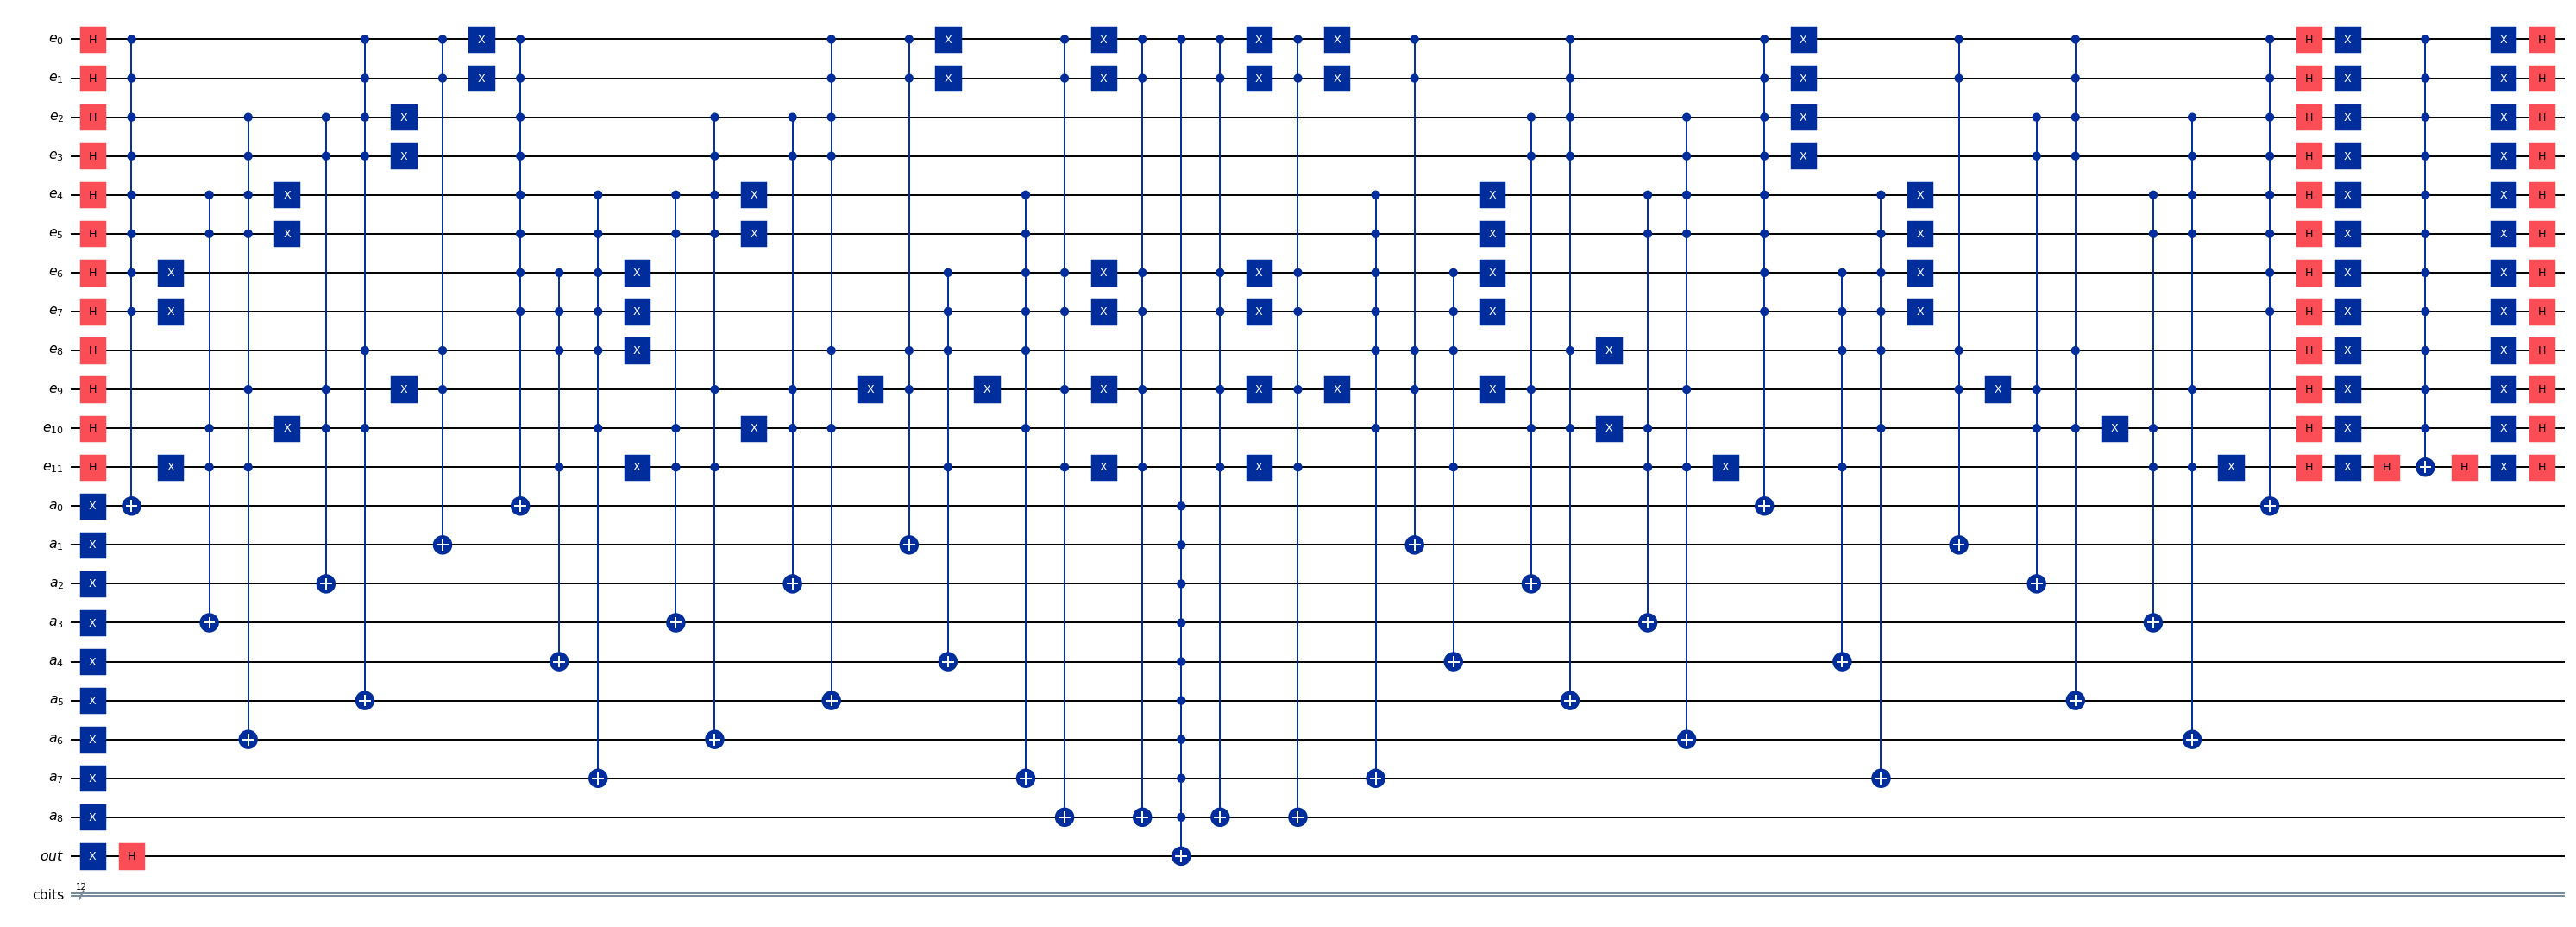

In [4]:
qc.draw('mpl', plot_barriers=False, scale=0.7, fold=-1)

In [5]:
def to_pure_matrix(matrix):
    # get rid of floating point error
    # change -0.0 to 0.0
    return np.around(matrix, 10) + 0.

# Version 1 Normal Qiskit qubit ordering

## Statevector AerSimulator

In [6]:
qc.save_statevector()
statevector_simulator = AerSimulator(method='statevector')
circ = transpile(qc, statevector_simulator)
result = statevector_simulator.run(circ).result()
print("Simulation took {} s".format(result.time_taken))
statevector = result.get_statevector()

from qiskit.quantum_info import partial_trace

# trace out the auxilary and out qubits to only get the statevector of e register
partial_density_matrix = to_pure_matrix(np.diagonal(partial_trace(statevector, [i for i in range(E_CNT, E_CNT+A_CNT+OUT_CNT)])))

statevec = np.asarray(partial_density_matrix)

statevec = statevec / np.linalg.norm(statevec)

print(statevec)

import matplotlib.pyplot as plt

binary_states = [format(i, '0{}b'.format(int(len(statevec).bit_length() - 1))) for i in range(len(statevec))]
probabilities = [abs(x)**2 for x in statevec]

# sanity check
sum = 0
for prob in probabilities:
    sum += prob
print(sum)

cnt = 0
for p in probabilities:
    if p >= 0.0005:
        cnt += 1

print("Peak count:", cnt)

Simulation took 0.21614623069763184 s
[0.00025209+0.j 0.00025209+0.j 0.02887689+0.j 0.00025209+0.j
 0.02887689+0.j 0.00025209+0.j 0.02887689+0.j 0.00025209+0.j
 0.02887689+0.j 0.00025209+0.j 0.02887689+0.j 0.00025209+0.j
 0.02887689+0.j 0.00025209+0.j 0.02887689+0.j 0.00025209+0.j
 0.02887689+0.j 0.00025209+0.j 0.02887689+0.j 0.00025209+0.j
 0.02887689+0.j 0.00025209+0.j 0.02887689+0.j 0.00025209+0.j
 0.02887689+0.j 0.00025209+0.j 0.02887689+0.j 0.00025209+0.j
 0.02887689+0.j 0.00025209+0.j 0.02887689+0.j 0.00025209+0.j
 0.02887689+0.j 0.00025209+0.j 0.02887689+0.j 0.00025209+0.j
 0.02887689+0.j 0.00025209+0.j 0.02887689+0.j 0.00025209+0.j
 0.02887689+0.j 0.00025209+0.j 0.02887689+0.j 0.00025209+0.j
 0.02887689+0.j 0.00025209+0.j 0.02887689+0.j 0.00025209+0.j
 0.02887689+0.j 0.00025209+0.j 0.02887689+0.j 0.00025209+0.j
 0.02887689+0.j 0.00025209+0.j 0.02887689+0.j 0.00025209+0.j
 0.02887689+0.j 0.00025209+0.j 0.02887689+0.j 0.00025209+0.j
 0.02887689+0.j 0.00025209+0.j 0.02887689+0.j 0